# AI Lab Parctical 2: Basic Image Transformation

## Introduction to Image Transformation

Let $r = f(x,y)$ denote the original intensity function of a digital image at spatial coordinates $(x, y)$, where each intensity value ranges between 0 and 225. In this section we will introduce the pixel transformation (point process) following the operator T which applied to $f(x, y)$ to generate a new image intensity $s = g(x, y)$ was expressed as:

$g(x, y) = T[f(x, y)]$ or $s = T[r]$

Let discuss several basic operators of transformation T or some technique should be applied to improve the quality of the original image.

## 1. Image Negatives

The negative of an image with intensity levels in the range $[0, 255]$ is obtained by using the negative transformation function shown:

$s = T[r] = 255-r$

This type of processing is used for example, in enhancing white or gray detail embedded in dark regions of an image, especially when the black areas are dominant in size.

**Question 1**: Create a variable named `im_1` to store the image `text_jpg` located in the folder `image_test_2` using the function `cv2.imread()`. Convert the original image to grayscale using the function `cv2.cvtColor()` to prepare it for processing.

In [3]:
import cv2
import matplotlib.pyplot as plt

In [4]:
im_1 = cv2.imread("/Users/somchannreaksmey/Documents/I4-AMS-B/Artificial Intelligence/TP2/image_test_2/text.jpg")
im_1 = cv2.cvtColor(im_1, cv2.COLOR_BGR2GRAY)

**Question 2:** Define a function named `im_negative()` in Python to perform the negative transformation operation. Use this function to generate a new image with inverted intensity values from `im_1`, and store the result in a variable named `im_1_neg`

In [5]:
def im_negative(r):
    return 255 - r

im_1_neg = im_negative(im_1)

**Question 3:** Display both the original grayscale image and its negative-transformed image using a subplot layout of 1x2 (1 row and 2 columns). Label the subplots appropriately as `Original` and `Negative Transform`, as illustrated in the figure above.

Text(0.5, 1.0, 'Negative Transformation')

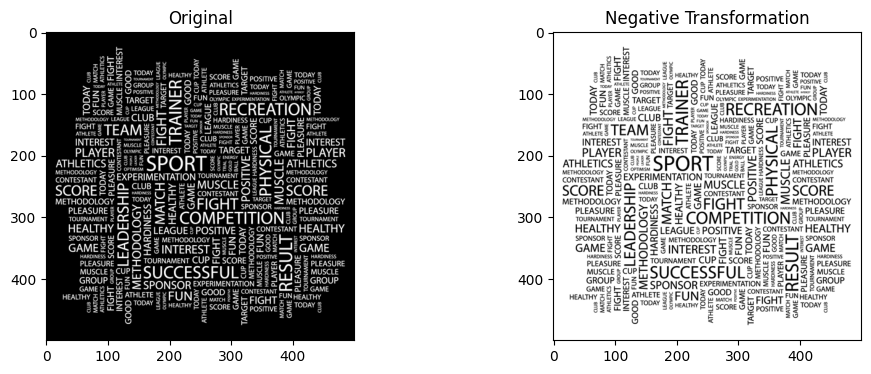

In [6]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(im_1, cmap='gray')
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(im_1_neg, cmap='gray')
plt.title('Negative Transformation')

## 2. Log Transformations

The General form of the log transformation as express in the function:

$s = T[r] = c\log(1+r)$

We use a transformation of this type to expand the values of dark pixels in an image, while compressing the higher-level values. The objective aim to enhance the contrast of an image using the logarithmic transformation. To do so, consider the constant `c` and explore its effect by varying its value within the range $[0, +\infty)$. Use the image named `MRI.png`, located in the folder `image_test_2`, which represents a magnetic resonance image (MRI) of the human upper thoracic spine with a fracture dislocation.

Since certain regions of the image appear dark, apply the logarithmic intensity tranformation with different `c` values to observe the resulting contrast enhancement. After processing, record your observations and provide remarks on how the transformation affecrs the visual quality of the image.

In [7]:
import numpy as np

In [8]:
im_mri = cv2.imread("/Users/somchannreaksmey/Documents/I4-AMS-B/Artificial Intelligence/TP2/image_test_2/MRI.png", cv2.IMREAD_GRAYSCALE)

In [9]:
def log_transform(im, c):
    im_float = im.astype(float)
    im_log = c * np.log1p(im_float)

    im_log = np.uint8(255 * im_log/np.max(im_log))
    return im_log

In [10]:
c = 1
im_mri_log = log_transform(im_mri, c)

Text(0.5, 1.0, 'Log Transformation')

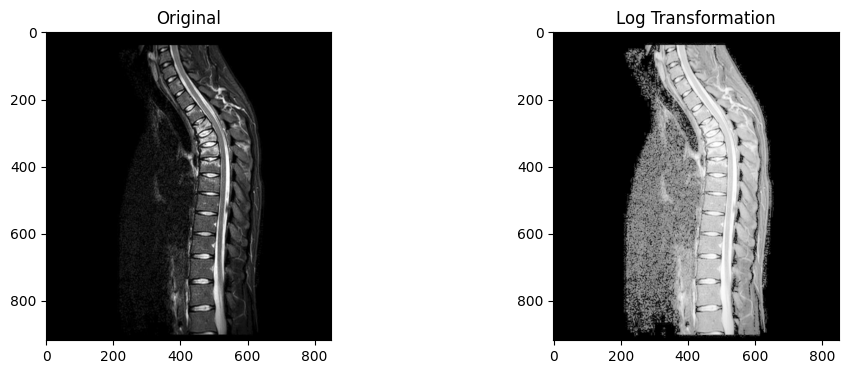

In [11]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(im_mri, cmap='gray')
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(im_mri_log, cmap='gray')
plt.title('Log Transformation')

## 3. Power-Law (Gamma) Transformations

Given that a gamma function or power-law transformation in form:

$s = T[r] = cr^\gamma$

This transformation is widely used in image enhancement to adjust the overall brightness and contrast of an image through the manipulation of intensity levels. The parameter 𝛾 (gamma) controls the degree of enhancement. In this section we will explore the different 𝛾 values given that:
* $\gamma<1$: Enhances brightness by expanding the intensity levels of dark pixels, making darker regions appear lighter.
* $\gamma=1$: Produces a linear transformation, meaning the output image is identical to the input (no change in contrast or brightness).
* $\gamma>1$: Enhances contrast in bright regions by compressing dark pixels and emphasizing brighter areas, making the image appear darker overall but with improved contrast in light regions.

Let working on analyze an aerial image, which refers to an image captured from an airborne platform such as an aircraft or drone. The image named `aerial.png`, is located in the folder `image_test_2`.

The aerial image exhibits certain visual characteristics, particularly low brightness and a slightly blurred appearance. The objective of this exercise is to apply the gamma transformation technique to enhance the image quality by adjusting its brightness and contrast levels. Through this experiment, we aim to observe how different gamma 𝛾 values influence the visual properties of the aerial image and to determine the optimal transformation for improved visibility and clarity.

In [12]:
im_aerial = cv2.imread("/Users/somchannreaksmey/Documents/I4-AMS-B/Artificial Intelligence/TP2/image_test_2/aerial.png", cv2.IMREAD_GRAYSCALE)

In [13]:
def gamma_transform(im, c, gamma):
    im_float = im.astype(float)/255
    im_gamma = c * np.power(im_float, gamma)
    im_gamma = np.uint8(255*im_gamma/np.max(im_gamma))
    return im_gamma

In [14]:
c = 100
gamma = 5

im_aerial_gamma = gamma_transform(im_aerial, c, gamma)

Text(0.5, 1.0, 'Gamma Transformation')

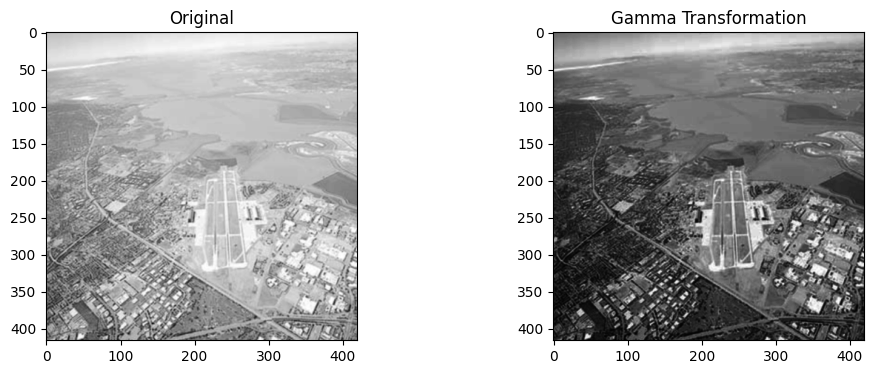

In [15]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(im_aerial, cmap='gray')
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(im_aerial_gamma, cmap='gray')
plt.title('Gamma Transformation')

## 4. Histogram Processing

The histogram provides basic global measures that describe the overall appearance of an image. Consider four images from the folder `image_test_2` namely `low.png`, `high.png`, `light.png`, and `dark.png` which represent low-contrast, high-contrast, bright, and dark images, respectively.

**Question 1:** Image Distribution

(1.1) Load each image following name’s variable [`low`, `high`, `bright`, `dark`] with OpenCV packages then convert into grayscale with function `cv2.cvtColor()`.

In [16]:
low = cv2.imread("/Users/somchannreaksmey/Documents/I4-AMS-B/Artificial Intelligence/TP2/image_test_2/low.png")
low = cv2.cvtColor(low, cv2.COLOR_BGR2GRAY)

high = cv2.imread("/Users/somchannreaksmey/Documents/I4-AMS-B/Artificial Intelligence/TP2/image_test_2/high.png")
high = cv2.cvtColor(high, cv2.COLOR_BGR2GRAY)

bright = cv2.imread("/Users/somchannreaksmey/Documents/I4-AMS-B/Artificial Intelligence/TP2/image_test_2/bright.png")
bright = cv2.cvtColor(bright, cv2.COLOR_BGR2GRAY)

dark = cv2.imread("/Users/somchannreaksmey/Documents/I4-AMS-B/Artificial Intelligence/TP2/image_test_2/dark.png")
dark = cv2.cvtColor(dark, cv2.COLOR_BGR2GRAY)

(1.2) Set the number of bins to 50 and compute the histogram of the grayscale image using the function `np.histogram()`. Store the resulting histogram values and bin edges in two variables named `hist` and `bin_edges`. Make sure the histogram covers the full pixel intensity range (0–256).

In [17]:
hist, bin_edges = np.histogram(bright, bins=50, range=(0, 256))

(1.3) Display the histogram as a bar chart using the function `plt.bar()`. Use the bin edges `(bin_edges[:-1])` as the x-values and histogram counts (hist) as the heights. Set the bar color to `skyblue` and the edge color to `red`. Adjust the bar width slightly smaller using `(256 / bins) * 0.9` to prevent overlap.

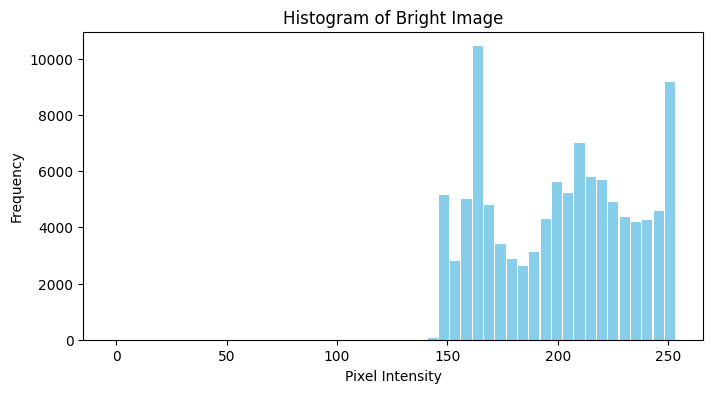

In [19]:
bins = len(hist)
bar_width = (256 / bins) * 0.9

plt.figure(figsize=(8, 4))
plt.bar(bin_edges[:-1], hist, width=bar_width, color='skyblue')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Bright Image')
plt.show()